In [1]:
import echelle

import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

import importlib
importlib.reload(echelle)
%matplotlib widget

In [2]:
data = pd.read_fwf('data/8144907.seis', header=None, names=['freq', 'sbr'], infer_nrows=1000000).dropna()
Δν, νmax = 17.47132, 208.20276


data['sbrs'] = data['sbr'].rolling(int(Δν*0.008/data['freq'].diff().median()), center=True, win_type='bartlett').mean()

data = data.dropna()
nu, ps = data['freq'], data['sbrs']-1

m = (nu > 140) & (nu < 260) & (np.isfinite(ps))
nu, ps = nu[m], ps[m]
ps = ps - 1


In [3]:
data

,freq,sbr,sbrs
8,65.048113,0.571577,0.537641
9,65.055984,0.492028,0.557078
10,65.063855,0.079329,0.571967
11,65.071727,0.759627,0.623967
12,65.079598,0.245121,0.666815
...,...,...,...
27080,278.138930,0.343923,0.703807
27081,278.146802,0.148660,0.725363
27082,278.154673,0.239813,0.790563
27083,278.162544,0.989653,0.877110


# interactive mode

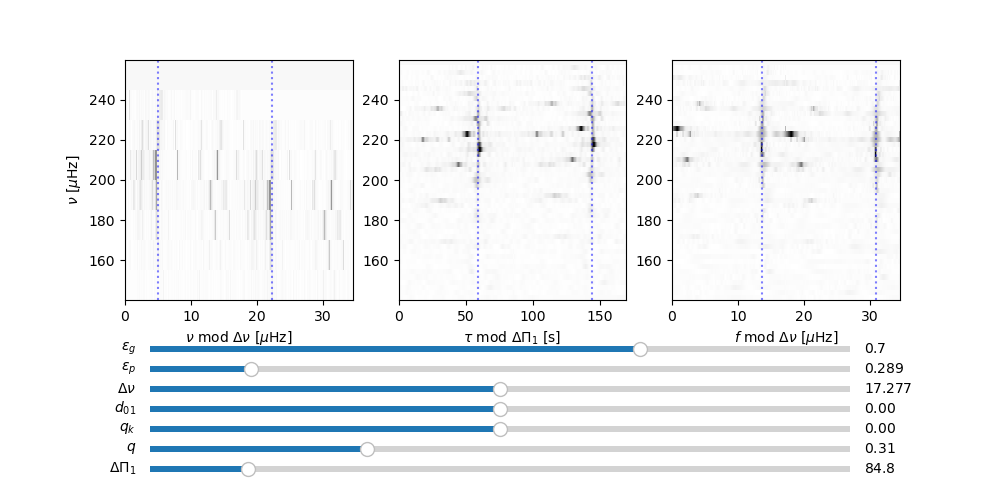

In [4]:
# KIC 8144907
params = {'ΔΠ1': 84.84, 'q': 0.31, 'q_k':0., 'Δν':17.277, 'ε_p':0.289, 'ε_g':0.7, 'd01': 0.00, 'α_p': 0., 'ν_max':0.}

widget = echelle.interact_stretched_echelle(params, nu=nu, ps=ps, show_vlines=True)


# standalone mode

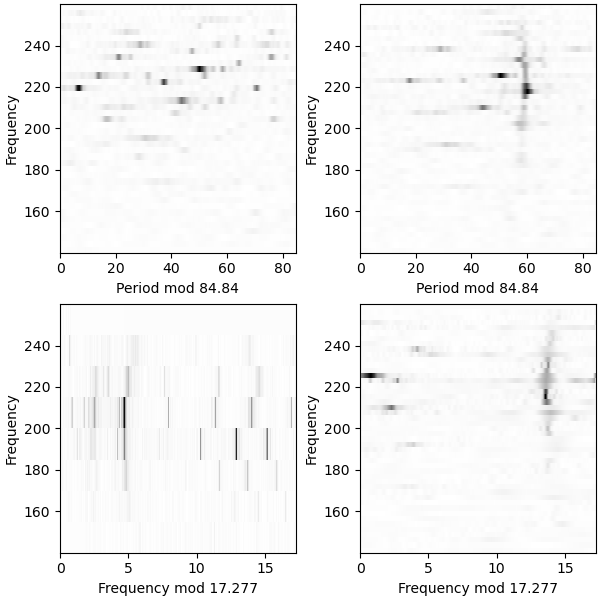

In [5]:
# KIC 8144907
params = {'ΔΠ1': 84.84, 'q': 0.31, 'q_k':0., 'Δν':17.277, 'ε_p':0.289, 'ε_g':0.7, 'd01': 0.00, 'α_p': 0., 'ν_max':0.}

# regular period echelle
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(6,6), constrained_layout=True)
ax = ax.reshape(-1)
echelle.plot_period_echelle(nu, ps, params['ΔΠ1'], ax=ax[0]); 

# stretched period echelle
echelle.plot_period_echelle(nu, ps, params['ΔΠ1'], tau=echelle.make_τ(nu, params), ax=ax[1]); 

# regular frequency echelle
echelle.plot_frequency_echelle(nu, ps, params['Δν'], ax=ax[2]); 

# strectched frequency echelle
echelle.plot_frequency_echelle(nu, ps, params['Δν'], f=echelle.make_f(nu, params), ax=ax[3]); 